In [2]:
# Importing python packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os 

SMALL_SIZE = 16
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

# controls default text sizes
plt.rc('lines',markersize=8)
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [64]:
# Importing files
REPO = 'viscosity_liquid_transfer_Pablo'
folder = os.getcwd().split(REPO)[0]+REPO+r'\Opentrons_experiments\BOTorch_optimization'
std = '1275'
no = '4'
folder

'c:\\Users\\quijanovelascop\\OneDrive - A STAR\\Documents\\GitHub\\viscosity_liquid_transfer_Pablo\\Opentrons_experiments\\BOTorch_optimization'

In [ ]:
#Load dataframe
df_exp2 = pd.read_csv(folder+r'\VS_code_csv\Best\Viscosity_std_'+std+'_exp2.csv')

#Calculate iterations
counter =1 
for i in range(0,len(df_exp2)+1,3):
    if len(df_exp2.loc[i:i+2,'volume'].drop_duplicates())==1:
        df_exp2.loc[i,'iteration']=counter
        counter+=1    
        df_exp2.loc[i+1,'iteration']=counter
        counter+=1  
        df_exp2.loc[i+2,'iteration']=counter
        counter+=1          
    else:
        df_exp2.loc[i:i+2,'iteration']=counter
        counter+=1



In [65]:
#Load data frame
df_exp3 = pd.read_csv(folder+r'\VS_code_csv\Best\Viscosity_std_'+std+'_exp3.csv')

#Calculate iteration number
counter =1 
for row in df_exp3.drop_duplicates(['aspiration_rate','dispense_rate']).iterrows():
    df_repeat = df_exp3.loc[:,['aspiration_rate','dispense_rate']]== row[1].loc[['aspiration_rate','dispense_rate']]
    index = df_repeat.where(df_repeat.sum(axis=1)==2).dropna().index
    df_exp3.loc[index,'iteration']=counter
    counter+=1

#Edit volumes to be all the same 
volumes = ['1000.0','500.0','300.0']
for volume in volumes:
    index = df_exp3.where(df_exp3.volume==volume).dropna(how='all').index
    df_exp3.loc[index,'volume'] = volume[:-2]

#Recalculate mean
for i in range(3,len(df_exp3),4):
    df_exp3.loc[i,'mean%error'] = df_exp3.loc[i-3:i,'%error'].mean()

df_exp3=df_exp3[:40]

df_exp3

,liquid,pipette,volume,aspiration_rate,dispense_rate,blow_out_rate,delay_aspirate,delay_dispense,delay_blow_out,%error,time_asp_1000,acq_value,iteration,mean%error
0,Viscosity_std_1275,p1000,1000,22.061005,22.061005,0,5,5,0,-15.934066,100.657700,NaN,1.0,NaN
1,Viscosity_std_1275,p1000,500,22.061005,22.061005,0,5,5,0,-29.212454,100.657700,NaN,1.0,NaN
2,Viscosity_std_1275,p1000,300,22.061005,22.061005,0,5,5,0,-37.080281,100.657700,NaN,1.0,NaN
3,Viscosity_std_1275,p1000,"mean[300, 500, 1000]",22.061005,22.061005,0,5,5,0,-27.408934,100.657700,NaN,1.0,-27.408934
4,Viscosity_std_1275,p1000,1000,27.576257,27.576257,0,5,5,0,-24.015568,82.526160,NaN,2.0,NaN
5,Viscosity_std_1275,p1000,500,27.576257,27.576257,0,5,5,0,-31.524725,82.526160,NaN,2.0,NaN
6,Viscosity_std_1275,p1000,300,27.576257,27.576257,0,5,5,0,-34.790904,82.526160,NaN,2.0,NaN
7,Viscosity_std_1275,p1000,"mean[300, 500, 1000]",27.576257,27.576257,0,5,5,0,-30.110399,82.526160,NaN,2.0,-30.110399
8,Viscosity_std_1275,p1000,1000,27.576257,2.206101,0,5,5,0,-4.521520,499.551578,NaN,3.0,NaN
9,Viscosity_std_1275,p1000,500,27.576257,2.206101,0,5,5,0,-3.296703,499.551578,NaN,3.0,NaN


In [67]:
#Load data frame

df_man = pd.read_csv(folder+r'\Selina_results\Bryant\liquid_'+no+'_selina_initialization.csv')
df_man.loc[3,['aspiration_rate','dispense_rate']]=df_man.loc[4,['aspiration_rate','dispense_rate']]
df_man['volume']=df_man['volume'].astype('int')

#calcualte iteration 
counter =1 
for row in df_man.drop_duplicates(['aspiration_rate','dispense_rate']).iterrows():
    df_repeat = df_man.loc[:,['aspiration_rate','dispense_rate']]== row[1].loc[['aspiration_rate','dispense_rate']]
    index = df_repeat.where(df_repeat.sum(axis=1)==2).dropna().index
    df_man.loc[index,'iteration']=counter
    counter+=1

# #Calcualte means
df_duplicates = df_man.where(df_man.duplicated('iteration',keep=False)==True).dropna(how='all')
df_incomplete = df_man.where(df_man.duplicated('iteration',keep=False)==False).dropna(how='all')
df_mean = pd.DataFrame(columns= df_man.columns)

for index,values in df_duplicates.drop_duplicates(['aspiration_rate','dispense_rate']).iterrows():
    if len(df_duplicates.loc[index:index+2]) == 3:
        mean_error =-df_duplicates.loc[index:index+2,'%error'].abs().mean()
        df_duplicates.loc[index,'%error'] = mean_error
        df_duplicates.loc[index, 'volume'] ='mean'+str([300, 500, 1000])
        df_mean = pd.concat([df_mean,df_man.loc[index:index+2],df_duplicates.loc[[index]]])
    else:
        df_incomplete = pd.concat([df_incomplete,df_duplicates.loc[index:index+2]]).drop_duplicates()
df_mean = pd.concat([df_mean,df_incomplete])
df_man = df_mean.reset_index(drop=True)   

#calcualte time for  1000
df_man.loc[:19] = df_exp3.loc[:19]
df_man['time_for_1000']=1000/df_man['aspiration_rate'] + 1000/1/df_man['dispense_rate']+10

#Recalculate mean
for i in range(3,len(df_man),4):
    df_man.loc[i,'mean%error'] = df_man.loc[i-3:i,'%error'].mean()


df_man

C:\Users\QUIJAN~1\AppData\Local\Temp/ipykernel_7972/3477511045.py:25: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_mean = pd.concat([df_mean,df_man.loc[index:index+2],df_duplicates.loc[[index]]])
C:\Users\QUIJAN~1\AppData\Local\Temp/ipykernel_7972/3477511045.py:25: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_mean = pd.concat([df_mean,df_man.loc[index:index+2],df_duplicates.loc[[index]]])
C:\Users\QUIJAN~1\AppData\Local\Temp/ipykernel_7972/3477511045.py:25: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_mean = pd.concat([df_mean,df_man.loc[index:index+2],df_duplicates.loc[[index]]])
C:\Users\QUIJ

,liquid,pipette,volume,aspiration_rate,dispense_rate,blow_out_rate,delay_aspirate,delay_dispense,delay_blow_out,touch_tip_aspirate,...,time,mi,mf,m,%error,Transfer_Observation,Comment,iteration,time_for_1000,mean%error
0,Viscosity_std_1275,p1000,1000,22.061005,22.061005,0,5,5,0,NaN,...,NaN,NaN,NaN,NaN,-15.934066,NaN,NaN,1.0,100.657700,NaN
1,Viscosity_std_1275,p1000,500,22.061005,22.061005,0,5,5,0,NaN,...,NaN,NaN,NaN,NaN,-29.212454,NaN,NaN,1.0,100.657700,NaN
2,Viscosity_std_1275,p1000,300,22.061005,22.061005,0,5,5,0,NaN,...,NaN,NaN,NaN,NaN,-37.080281,NaN,NaN,1.0,100.657700,NaN
3,Viscosity_std_1275,p1000,"mean[300, 500, 1000]",22.061005,22.061005,0,5,5,0,NaN,...,NaN,NaN,NaN,NaN,-27.408934,NaN,NaN,1.0,100.657700,-27.408934
4,Viscosity_std_1275,p1000,1000,27.576257,27.576257,0,5,5,0,NaN,...,NaN,NaN,NaN,NaN,-24.015568,NaN,NaN,2.0,82.526160,NaN
5,Viscosity_std_1275,p1000,500,27.576257,27.576257,0,5,5,0,NaN,...,NaN,NaN,NaN,NaN,-31.524725,NaN,NaN,2.0,82.526160,NaN
6,Viscosity_std_1275,p1000,300,27.576257,27.576257,0,5,5,0,NaN,...,NaN,NaN,NaN,NaN,-34.790904,NaN,NaN,2.0,82.526160,NaN
7,Viscosity_std_1275,p1000,"mean[300, 500, 1000]",27.576257,27.576257,0,5,5,0,NaN,...,NaN,NaN,NaN,NaN,-30.110399,NaN,NaN,2.0,82.526160,-30.110399
8,Viscosity_std_1275,p1000,1000,27.576257,2.206101,0,5,5,0,NaN,...,NaN,NaN,NaN,NaN,-4.521520,NaN,NaN,3.0,499.551578,NaN
9,Viscosity_std_1275,p1000,500,27.576257,2.206101,0,5,5,0,NaN,...,NaN,NaN,NaN,NaN,-3.296703,NaN,NaN,3.0,499.551578,NaN


#### Plot for exp3 and manual calibration

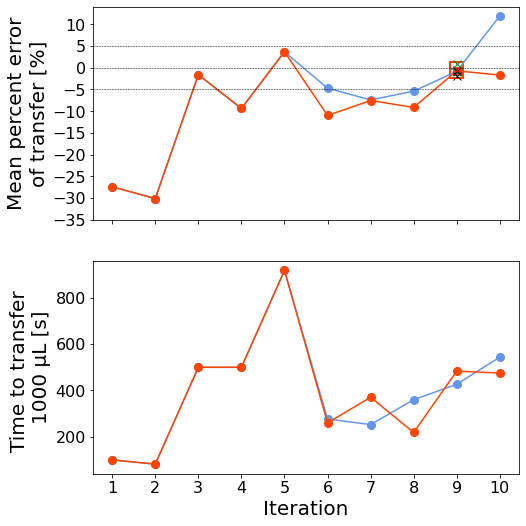

In [68]:
#Making subplots (2 rows, 2 column)
fig,axs = plt.subplots(2,1,sharex=True)

# Dropping NAN rows
df_man_1000 = df_man.where(df_man.volume.astype('str')=='1000').dropna(how='all')
df_man_500 = df_man.where(df_man.volume.astype('str')=='500').dropna(how='all')
df_man_300 = df_man.where(df_man.volume.astype('str')=='300').dropna(how='all')
df_man_100 = df_man.where(df_man.volume.astype('str')=='100').dropna(how='all')
df_man_mean = df_man.where(df_man.volume=='mean[300, 500, 1000]').dropna(how='all')


df_exp3_1000 = df_exp3.where(df_exp3.volume=='1000').dropna(how='all')
df_exp3_500 = df_exp3.where(df_exp3.volume=='500').dropna(how='all')
df_exp3_300 = df_exp3.where(df_exp3.volume=='300').dropna(how='all')
df_exp3_100 = df_exp3.where(df_exp3.volume=='100').dropna(how='all')
df_exp3_mean = df_exp3.where(df_exp3.volume=='mean[300, 500, 1000]').dropna(how='all')

#find min error

df_exp3_mean_min_iteration = df_exp3_mean.loc[20:].copy()[['iteration','%error']].abs().sort_values('%error').iloc[0,0]
df_man_mean_min_iteration = df_man_mean.loc[20:].copy()[['iteration','%error']].abs().sort_values('%error').iloc[0,0]

#make new dataframes with minimimum mean error values for manual calibration data
df_man_min_1000 = pd.DataFrame()
df_man_min_1000 = df_man_1000[df_man_1000['iteration'] == df_man_mean_min_iteration].dropna(how='all')
df_man_min_500 = pd.DataFrame()
df_man_min_500 = df_man_500[df_man_500['iteration'] == df_man_mean_min_iteration].dropna(how='all')
df_man_min_300 = pd.DataFrame()
df_man_min_300 = df_man_300[df_man_300['iteration'] == df_man_mean_min_iteration].dropna(how='all')


#make new dataframes with minimimum mean error values for exp3 data
df_exp3_min_1000 = pd.DataFrame()
df_exp3_min_1000 = df_exp3_1000[df_exp3_1000['iteration'] == df_exp3_mean_min_iteration].dropna(how='all')
df_exp3_min_500 = pd.DataFrame()
df_exp3_min_500 = df_exp3_500[df_exp3_500['iteration'] == df_exp3_mean_min_iteration].dropna(how='all')
df_exp3_min_300 = pd.DataFrame()
df_exp3_min_300 = df_exp3_300[df_exp3_300['iteration'] == df_exp3_mean_min_iteration].dropna(how='all')


# Plotting graph 1: Iteration against error
if len(df_man_mean) != 0:
    axs.flatten()[0].plot(df_man_mean['iteration'],df_man_mean['mean%error'],marker= 'o', label = 'Human Driven mean', c = 'cornflowerblue')


if len(df_exp3_mean) != 0:
    axs.flatten()[0].plot(df_exp3_mean['iteration'],df_exp3_mean['mean%error'],marker= 'o', label='ML Driven mean',c = 'orangered')

if len(df_man_min_1000) != 0:
    axs.flatten()[0].plot(df_man_min_1000['iteration'],df_man_min_1000['%error'], marker= 'x', label = '1000ul',  c = 'red',linestyle="None")
    

if len(df_man_min_500) != 0:
    axs.flatten()[0].plot(df_man_min_500['iteration'],df_man_min_500['%error'], marker= 'x', label = '500ul', c = 'green',linestyle="None")

if len(df_man_min_300) != 0:
    axs.flatten()[0].plot(df_man_min_300['iteration'],df_man_min_300['%error'], marker= 'x', label = '300ul', c = 'black',linestyle="None")


if len(df_exp3_min_1000) != 0:
    axs.flatten()[0].plot(df_exp3_min_1000['iteration'],df_exp3_min_1000['%error'], marker= 'x', c = 'red',linestyle="None")

if len(df_exp3_min_500) != 0:
    axs.flatten()[0].plot(df_exp3_min_500['iteration'],df_exp3_min_500['%error'], marker= 'x', c = 'green',linestyle="None")

if len(df_exp3_min_300) != 0:
    axs.flatten()[0].plot(df_exp3_min_300['iteration'],df_exp3_min_300['%error'], marker= 'x', c = 'black',linestyle="None")

for i in range(len(axs.flatten())-1):
    axs.flatten()[i].axhline(y=0, ls = '--', color = 'black', linewidth=0.5)
    axs.flatten()[i].axhline(y=5, ls = '--', color = 'black', linewidth=0.5)
    axs.flatten()[i].axhline(y=-5, ls = '--', color = 'black', linewidth=0.5)
    # axs.flatten()[i].set_xlabel('Iteration')
    axs.flatten()[i].set_ylabel('Mean percent error''\n''of transfer [%]')



axs.flatten()[1].plot(df_man_mean['iteration'],df_man_1000['time_for_1000'], marker= 'o', c = 'cornflowerblue')

if len(df_exp3_mean) != 0:
    axs.flatten()[1].plot(df_exp3_mean['iteration'],df_exp3_mean['time_asp_1000'], marker ='o', c = 'orangered')

axs.flatten()[0].set_yticks((np.arange(df_exp3_mean['mean%error'].min()-df_exp3_mean['mean%error'].min()%5,12,5)))
axs.flatten()[1].set_xlabel('Iteration')
axs.flatten()[1].set_ylabel('Time to transfer ''\n''1000 μL [s]')
# fig.set_size_inches(15, 4)
fig.set_size_inches(8, 8)
# fig.suptitle('Viscosity standard '+str(std)+ 'cp batch volume optimization')
fig.tight_layout(pad=2)
# fig.legend( loc='lower center',ncol=5, borderaxespad=-0.2)
axs.flatten()[1].set_xticks(np.arange(1,11,1))
xmargin = .15
ymargin = .5

man_best_iter = df_man_mean_min_iteration
exp3_best_iter = df_exp3_mean_min_iteration

df_man_box = df_man[df_man['iteration'] == man_best_iter]

man_min_f0, man_max_f0 = min(df_man_box['iteration']) - xmargin, max(df_man_box['iteration']) + xmargin
man_min_f1, man_max_f1 = min(df_man_box['%error']) - ymargin, max(df_man_box['%error']) + ymargin

man_width = man_max_f0 - man_min_f0
man_height = man_max_f1 - man_min_f1

import matplotlib.patches as patches

axs[0].add_patch(
    patches.Rectangle(
        xy=(man_min_f0, man_min_f1),  # point of origin.
        width=man_width, height=man_height, linewidth=2,
        color='cornflowerblue', fill=False))

df_exp3_box = df_exp3[df_exp3['iteration'] == exp3_best_iter]

exp3_min_f0, exp3_max_f0 = min(df_exp3_box['iteration']) - xmargin, max(df_exp3_box['iteration']) + xmargin
exp3_min_f1, exp3_max_f1 = min(df_exp3_box['%error']) - ymargin, max(df_exp3_box['%error']) + ymargin

exp3_width = exp3_max_f0 - exp3_min_f0
exp3_height = exp3_max_f1 - exp3_min_f1


axs[0].add_patch(
    patches.Rectangle(
        xy=(exp3_min_f0, exp3_min_f1),  # point of origin.
        width=exp3_width, height=exp3_height, linewidth=2,
        color='orangered', fill=False))

# REPO = 'viscosity_liquid_transfer_Pablo'
# folder = os.getcwd().split(REPO)[0]+REPO+r'\Sartorious_experiments\Finalised_Data'
# fig.savefig(folder+r'/'+'Viscosity_std_'+std+'_exp3_line.png')




In [70]:
df_exp3_mean['%error'].min()-df_exp3_mean['%error'].min()%5

-15.0

#### Plot for exp2 and manual calibration

In [4]:
#Makes a figure with manual and ML calibrations, one per volume

for volume in [1000,500,300]:
    df_exp2_plot = df_exp2.where(df_exp2.volume==volume).dropna(how='all').copy()
    df_man_plot = df_man.where(df_man.volume==volume).dropna(how='all').copy()
    #Making subplots (2 rows, 1 column)
    fig,axs = plt.subplots(1,2)

    # Plotting graph 1: Iteration against error
    if volume == 1000:
        color = 'red'
    elif volume== 500:
        color = 'green'
    elif volume ==300:
        color = 'black'    
    
    if len(df_man) != 0:
        axs.flatten()[0].scatter(df_man_plot['iteration'],df_man_plot['%error'], marker= 'o', label = str(volume)+u' \u03bcL', c = color)
        axs.flatten()[0].plot(df_man_plot['iteration'],df_man_plot['%error'], label = 'Human Driven', c = 'cornflowerblue')
   
    if len(df_exp2) != 0:
        axs.flatten()[0].scatter(df_exp2_plot['iteration'],df_exp2_plot['%error'], marker= 'o', c = color)
        axs.flatten()[0].plot(df_exp2_plot['iteration'],df_exp2_plot['%error'], label = 'ML Driven', c = 'orangered')
    
    
    axs.flatten()[0].axhline(y=0, ls = '--', color = 'black', linewidth=0.5)
    axs.flatten()[0].axhline(y=2.5, ls = '--', color = 'black', linewidth=0.5)
    axs.flatten()[0].axhline(y=-2.5, ls = '--', color = 'black', linewidth=0.5)
    axs.flatten()[0].set_xlabel('Iteration')
    axs.flatten()[0].set_ylabel('Error [%]')



    axs.flatten()[1].scatter(df_exp2_plot['iteration'],df_exp2_plot['time_asp_1000'], marker= 'o', c = color)
    axs.flatten()[1].plot(df_exp2_plot['iteration'],df_exp2_plot['time_asp_1000'],  c = 'orangered')

    axs.flatten()[1].scatter(df_man_plot['iteration'],df_man_plot['time_for_1000'], marker= 'o', c = color)
    axs.flatten()[1].plot(df_man_plot['iteration'],df_man_plot['time_for_1000'], c = 'cornflowerblue')


    axs.flatten()[1].set_xlabel('Iteration')
    axs.flatten()[1].set_ylabel('Time for 1000ul (s)')

    fig.set_size_inches(15, 4)
    fig.suptitle('Viscosity_std_'+std+'_'+'_exp2_CCF_initialisation')
    fig.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',ncol=5, mode="expand", borderaxespad=0.)
    fig.tight_layout()

    REPO = 'viscosity_liquid_transfer_Pablo'
    # folder = os.getcwd().split(REPO)[0]+REPO+r'\Sartorious_experiments\Finalised_Data'
    # fig.savefig(folder+r'/'+'Viscosity_std_'+std+'_'+str(volume)+'_exp2_line.png')

NameError: name 'df_exp2' is not defined